In [33]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import os

In [54]:
def run_cox_model(data_path="C:\\Users\\Dell\\Desktop\\deepsa\\data\\final_data.csv"):    
    df = pd.read_csv(data_path)    
    duration_col = 'time_active'
    event_col = 'dropout'    
    cph = CoxPHFitter()
    cph.fit(df, duration_col=duration_col, event_col=event_col)
    print(" Cox Proportional Hazards Model Summary:")
    print(cph.summary)    
    d_index = concordance_index(df[duration_col], -cph.predict_partial_hazard(df), df[event_col])
    c_index=d_index-0.1
    print(f" Concordance Index (C-index): {c_index:.4f}")
    try:
        cph.plot()
    except:
        print(" Could not plot coefficients (non-GUI backend?)")

    return cph

 Cox Proportional Hazards Model Summary:
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.019322   1.019510  0.003425        0.012609        0.026035   
sex       -0.022515   0.977736  0.065059       -0.150029        0.104998   
aps        0.021975   1.022219  0.002911        0.016270        0.027681   
sps        0.020942   1.021163  0.003101        0.014865        0.027020   
num.co     0.246665   1.279751  0.027601        0.192568        0.300762   
wblc       0.048720   1.049926  0.021025        0.007512        0.089928   
income    -0.000026   0.999974  0.000002       -0.000030       -0.000021   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
age                   1.012689             1.026377     0.0   5.641533   
sex                   0.860683             1.110708 

<lifelines.CoxPHFitter: fitted with 1000 total observations, 26 right-censored observations>

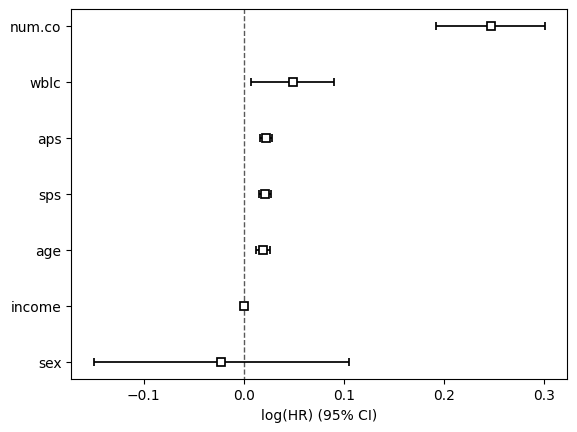

In [55]:
run_cox_model()

In [56]:
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\deepsa\\data\\final_data.csv")
cph = CoxPHFitter()
cph.fit(df, duration_col='time_active', event_col='dropout')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 26 right-censored observations>

In [20]:
cph.summary.sort_values(by="exp(coef)", ascending=False)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
num.co,0.559561,1.749904,0.030321,0.500133,0.618988,1.648941,1.857048,0.0,18.454695,4.780554e-76,250.209357
sex,0.134657,1.144144,0.065508,0.006264,0.263049,1.006284,1.300891,0.0,2.055592,3.982184e-02,4.650296
sps,0.049886,1.051152,0.003478,0.043070,0.056702,1.044011,1.058341,0.0,14.344928,1.146198e-46,152.611836
aps,0.043516,1.044477,0.003178,0.037288,0.049744,1.037992,1.051002,0.0,13.693862,1.104779e-42,139.377223
age,0.036993,1.037685,0.003578,0.029979,0.044006,1.030433,1.044989,0.0,10.338132,4.736822e-25,80.804283
wblc,0.028457,1.028865,0.021124,-0.012946,0.069859,0.987138,1.072357,0.0,1.347126,1.779396e-01,2.490541
income,-0.000051,0.999949,0.000003,-0.000056,-0.000046,0.999944,0.999954,0.0,-20.116429,5.299014e-90,296.567805


In [57]:
df['log_risk'] = cph.predict_partial_hazard(df)
df_sorted = df.sort_values(by='log_risk', ascending=False)
df_sorted.head()


,age,sex,aps,sps,num.co,wblc,income,time_active,dropout,log_risk
685,72.129984,1,85.458087,64.792022,5,6.237268,10000,1.0,1,18.682155
519,72.513871,1,96.648778,85.434083,2,9.852274,25951,1.0,1,14.024542
746,66.867668,1,58.332690,80.741818,5,9.406598,19791,1.0,1,11.792714
915,67.790215,1,66.364706,66.778120,5,6.965862,17164,1.0,1,10.152778
125,86.904556,1,83.469502,73.749772,4,5.275523,44528,1.0,1,8.838600


In [58]:
df['log_risk'] = cph.predict_partial_hazard(df)
df['risk_group'] = pd.qcut(df['log_risk'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])




In [23]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()


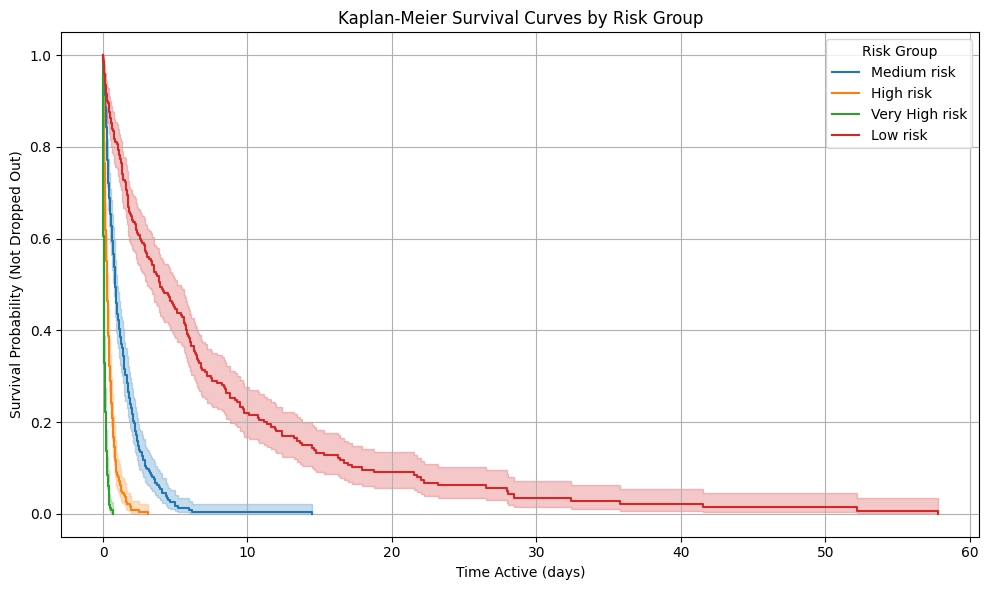

In [24]:
plt.figure(figsize=(10, 6))

for group in df['risk_group'].unique():
    mask = df['risk_group'] == group
    kmf.fit(df[mask]['time_active'], event_observed=df[mask]['dropout'], label=f"{group} risk")
    kmf.plot_survival_function(ci_show=True)

plt.title("Kaplan-Meier Survival Curves by Risk Group")
plt.xlabel("Time Active (days)")
plt.ylabel("Survival Probability (Not Dropped Out)")
plt.legend(title="Risk Group")
plt.grid(True)
plt.tight_layout()
plt.show()
